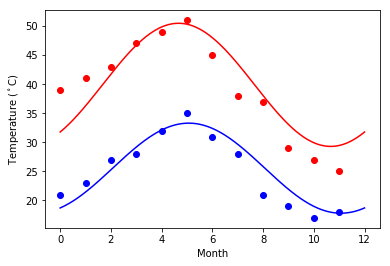

In [58]:
"""1) We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18"""


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
months = np.arange(0,12)
temp_max = np.array([39,41,43,47,49,51,45,38,37,29,27,25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

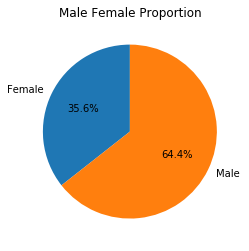

In [59]:
"""2) This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
 Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
"""
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

import pandas as pd
import numpy as np
titanic = pd.read_csv(url)

FemaleCount=len(titanic[titanic['sex'] == 'female'])
MaleCount=len(titanic[titanic['sex'] == 'male'])
province_population = [FemaleCount,MaleCount]
activities = ['Female', 'Male']
plt.pie(province_population, labels=activities, startangle=90, autopct='%.1f%%')
plt.title('Male Female Proportion')
plt.show()





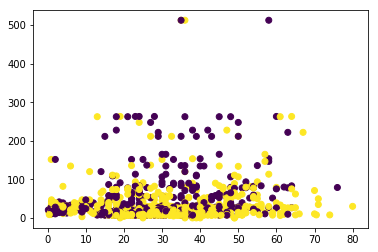

In [61]:
"2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender"
def recode_sex(sex):
    if sex == 'female':
        return 0 
    else:
        return 1 
titanic['sex_color'] = titanic['sex'].apply(recode_sex)

plt.scatter(titanic['age'],titanic['fare'],c=titanic['sex_color'])

